# Импорт библиотек

In [1]:
import requests
import pandas as pd
import pickle
from tqdm.auto import tqdm
import urllib.request
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep
import os
import socket

# Загрузка данных

In [21]:
#https://alphabetizer.flap.tv/lists/list-of-every-movie-ever-made.php
#https://www.moviesite.co.za/alfa.html?l=Z

## Список фильмов

In [22]:
kp = pd.read_csv('data/kinopoisk.csv',encoding='windows-1251')
kp['NAME'] = kp['NAME'].replace(' +', ' ', regex=True)
print(kp.shape)
kp.head()

(8104, 5)


,NAME,RATING,VOTES,GENRE,YEAR
0,зеленая книга,8.324,137042,"комедия, драма, биография",2018
1,они никогда не станут старше,8.227,1942,"документальный, военный, история",2018
2,фрисоло,8.180,1291,"документальный, спорт",2018
3,хильда,8.167,1678,"мультфильм, фэнтези, комедия",2018
4,капернаум,8.146,12884,драма,2018


In [23]:
imdb = pd.read_csv('data/imdb_db.csv')
print(imdb.shape)
imdb.head()

(12338, 5)


,NAME,RATING,VOTES,GENRE,YEAR
0,отверженные 25ая годовщина мюзикла,8.8,4660,"Drama, Music, Musical",2010
1,начало,8.8,1858608,"Action, Adventure, Sci-Fi",2010
2,душа и персона,8.6,2856,"Action, Crime, Thriller",2010
3,плохой герой,8.4,1200,"Comedy, Crime, Drama",2010
4,жизненный путь,8.4,2113,"Action, Drama",2010


In [24]:
films_set = list(set(list(kp['NAME'].dropna()) + list(imdb['NAME'].dropna())))
len(films_set)

15438

## Поиск фильмов на Кинопоиске

Требуется оплатить 500р 

In [25]:
kp_reponses = {}

In [26]:
for film_name in tqdm(enumerate(films_set), total=len(films_set)):    
    if film_name not in kp_reponses.keys():
        print(film_name, end=' | ')
        
        url = f'https://kinopoiskapiunofficial.tech/api/v2.1/films/search-by-keyword?keyword={film_name}'
        headers = {
            'X-API-KEY': 'd0105144-3479-4987-8e61-6e3538fd2d6f',
            'Content-Type': 'application/json',
        }
        r = requests.get(url, headers=headers)
        response = r.json()
        
        if 'status' in response.keys():
            break
        
        kp_reponses[film_name] = response

  0%|          | 0/15438 [00:00<?, ?it/s]

туринская лошадь | tod den hippies es lebe der punk | мерзлая земля | вой банши | городок семетри | морские дьяволы 4 | idharkuthane aasaipattai balakumara | jaane kahan se aayi hai | комната бабочек | застывшие депеши | реальная белка 2 | библия | итальянец | топор 3 | астма | сильная слабая женщина | шах и мат | торговля кожей | зимние братья | последний крестный отец | мгновение любви | поцелуй судьбы | kontorfalak | 80 milionow | христос под следствием | пурга | амазония инструкция по выживанию | фронтера | планета синглов | папочка | saat panj e asr | don seenu | king candy | мёртвые земли | жизнь адель | 600 кг золота | охотники за духами | ushi must marry | две женщины | электрические сны филипа к дика | пипец 2 | пустыня | наруто 7 потерянная башня | заповедник | лектор | asu mare | спаситель | думай как женщина | american beach house | ветряные дети | а зори здесь тихие | уруми | моя сестра невидимка | игра на высоте | алиенист | во имя короля 3 | da thadiya | мой маленький ан

бойся или умри | я закопаю тебя | the year dolly parton was my mom | aatma | насилие | voevoda | настоящие люди | zeny v pokuseni | угрызения совести | бладрейн 3 третий рейх | disneys newsies the broadway musical | скайлайн 2 | salim | book of monsters | горюнов | jonssonligan  den perfekta stoten | настоящий бадшах | под сильверлэйк | воспроизведение | рыцари зодиака легенда о святилище | салют7 | чужой | глаза панды | большой злой лис и другие сказки | сомнамбула | хорас и пит | поздняя осень | in the family | шорох кубиков льда | 1+1 нарушая правила | коммуна | этим летом | на краю | барбоскины | муссонные манго | джанго освобожденный | последние львы | конфетка | одна ночь в стамбуле | че | в погоне за драконами | la fille du 14 juillet | ван гоги | германская головоломка | ограбление | boule  bill | dan sun nam lui 2 | спит ли долли на спине | они пришли вместе | амфетамин | завтра я встречаюсь со вчерашней тобой | слепые свидания | всё или ничего | love games | susah sinyal | фо

бхавеш джоши супергерой | познать неизведанное | вот это любовь | три ловца ветра | санка рэа | лиззи борден взяла топор | zinda bhaag | barbie mariposa and the fairy princess | паранойя | сиджин 4 | дети шпионов 4d | лондонский шпион | танцуй ради шанса | гласленд | 13 yбийц | билл | жить | наше лето | кто я | fever | джек отправляется домой | хочешь или нет | to jennifer | белый гроб игра дьявола | ночные охранники | то что надо | мёртвые 2 индия | touch chesi chudu | лифт три минуты могут изменить вашу жизнь | кобра кай | смертельный список | рыжий пес самый верный | lemonade | bubblegum | немой | жемчуг дракона битва богов | super singh | мистер пип | мертвеннобледный | три богатыря ход конем | аноним 616 | полюби меня | coracoes sujos | убей меня исцели меня | кровавый пунш | по ту сторону надежды | парни со стволами | дикая история | будда в заторе | хантер киллер | bad grandmas | арденны | дочь бреста | rock the casbah | таинство | чебурашка | ценный груз | бабушка лёгкого повед

happiness runs | проникновение и бегство | сохрани мою речь навсегда | переломный момент | смсуальность | mr kaplan | её звали шабана | случайно беременна | mantervention | проклятие спящей красавицы | не впускай его | капитанша | непостижимое | два лика января | дочь якудзы | цирк колумбия | zaspanka za vojnike | вероника | b дoме отца | no culpes al karma de lo que te pasa por gilipollas | violent blue | ecstasy | судьбы загадочное завтра | пациент зеро | фотосессия | давай знакомиться кино | дни искушения | помни воскресенье | будущее в прошлом | неизбежное поражение мистера и пита | мстители | криптон | дарк | ариэтти из страны лилипутов | мужчина в ванне | картофельный салат | аврил и поддельный мир | рай существует | богатый мужчина бедная женщина | доля ангелов | страна призраков | эпизоды | чeловекволк | легенда о котедемоне | latin lover | стройка | клаустрофобия | войско мын бала | свинина аль денте | любовь не картошка | silencer | не входить мы не одеты | pojken med guldbyx

игрушки для взрослых | куклы беспокойства | ещё четыре года | тревожная кнопка | миссия лондон | os 3 | publieke werken | преступная деятельность | бродяга | преисподняя | открытие ведьм | одиян | нонна давай | вирус | раскопки | инопланетный код | ной | ночные движения | мордекай | эхо войны | хроники шаннары | 3 комнатыкухняванная | порядок и мораль | смертельная схватка | детям до 16 | тихоня | последний шаг | 41 | случайный роман | 24 | инфоголик | великолепный век | чужая страна | петух и бык | судная ночь начало | faith of our fathers | shesh peamim | материнская рана | рестлмания 28 | gentlemen | the last guest | враги среди нас | охота на снежного человека | boображаемая любовь | line of duty | общественная библиотека | вода и огонь | проклятие моей матери | дэдпул 2 | приходи как есть | куку | папаши без вредных привычек | мамула | дом грез | амитивилль экзорцизм | судьба ночь схватки | 37 | ada apa dengan cinta 2 | the black water vampire | ограбление поамерикански | великая 

половое воспитание | путь на запад наше секспутешествие | большая легенда | быть человеком | лесник | классные мужики | оборотни арги | runway | родительский беспредел | чёрное море | бедные люди | все копы ублюдки | павшая империя | slove прямо в сердце | страна хороших деточек | молодёжка | ненормальное явление | le trip a trois | крякнутые каникулы | избави нас от лукавого | chhello divas | перевоплощение | свободные люди округа джонс | невозможно не влюбиться | лего фильм ниндзяго | обратные дороги | паранорман или как приручить зомби | teraa surroor | сыт по горло | исчезнувшая | песнь тьмы | youre so cupid | дозор джунглей | давай будем плохими | видок император парижа | sous le meme toit | в москве всегда солнечно | неудержимый | валланцаска  ангелы зла | громче чем бомбы | королева пустыни | 30 miles from nowhere | spirit | красотки в париже | огни притона | talon falls | стэн против сил зла | побудь в моей шкуре | крут как я | пленница | наследие | despido procedente | сопроти

свидание для безумной мэри | пацаны 2 | необитаемый | призрак виллы натхов 2 | несломленный | a thousand cuts | на ощупь | сладостный край | жги | пэн путешествие в нетландию | другая сторона ветра | гургаон | трудная дорога | жданный принц | прощение крови | kesakaverit | суки | способный | тайное воссоединение | alienated | вечная сказка | каратель | рейд пуля в голове | бэтмен возвращение рыцарей в масках | раш | идём со мной | умопомрачительные фантазии чарли свонатретьего | извратная маска | проводник | морские динозавры 3d путешествие в доисторический мир | наводнение | ghayal once again | подходящий муж | нет мужчин  нет проблем | закрытая школа | театр призраков | the wedlock | safety first the movie | raiders of the lost shark | скорый москвароссия | небо падших | тюрьма | каникулы президента | darkness reigns | холодная рыба | персональный покупатель | ефросинья | сестра золушки | genesis | ярость 3 | hollywood dirt | красотки | никогда не возвращайтесь | голливудский мусор |

мой милый пепперленд | наши времена | bbc планета людей | run baby run | американская бикиниавтомойка | призрак гуднайт лэйн | форсаж 8 | вернер  холодный как лёд | мария кюри | детектив конан 19 | посмертный | невероятный страх перед всем | внесебя | философы урок выживания | переживая за боя | пришелец из космоса | короткая волна | саратовский подход | nazi overlord | 30 дней ночи темные времена | колпачино 2 бомба | taiga masuku | pacific standard time | холодная земля | murder on the cape | случайная вакансия | исход цари и боги | архипелаг | пакт 2 | 1+1 голливудская история | мачо и ботан | потерянная | entrance | пиноккио | записи левенджера | выпускной | адский бункер черное солнце | о лошадях и людях | bloodc последний темный | принц сибири | я ухожу | хайтарма | soonjung | плохая семья | на пределе | the legend of hells gate an american conspiracy | атлант расправил плечи часть 2 | читающий лица | акации | покемонфильм дианси и кокон разрушения | the midnight swim | haunting 

глаз божий | направления | величайший шоумен | побег из рио | чёрные священники | первые | детектив бобби | оа | пробуждение | грабитель виски | линия марты | путеводная звезда | мастера меча онлайн специальное издание | хэппи | танцевальная академия | хоть раз в жизни | дамасское укрытие | идеальная пара | полицейские будни | 2 зайца | трава под снегом | артур идеальный миллионер | городиспуг | нуреев белый ворон | анклав | внизу | 9 дней и одно утро | стерва для чемпиона | двадцатипятиборье | the laughing mask | raju gari gadhi 2 | yeokrin | паланкин долли | ведьмы | планета динозавров | and then i go | квартет и по амстелу | внедорожник | kismet love paisa dilli | псы под прикрытием | царство красоты | pass thru | gebo et lombre | полисс | здесь ктото есть | bastards of young | инсайдеры | выжить в арктике | человеческий род | эш против зловещих мертвецов | как преодолеть разрыв | алена | another evil | повар на колесах | abels field | банан | битва титанов | na granicy | свидетели 

правда о мужчинах | тачки 2 | plan de table | 90 минут на небесах | full love | острые козырьки | жизненный опыт | запретная зона | последнее слово | настоятель | vettah | the immortal wars | хаппи убежит | мантикора | достать мистера гоу | средний итальянский | одноклассники 2 | первая мировая | клуб неудачников в пути | джейсон борн | мельбурн | gas light | madras cafe | sos дед мороз или все сбудется | монах | свалка | попугай club | если вернется  твоя | раз два три умри | мастера секса | наши мальчики | rabb da radio | z fung bou | ночные стражи | три икса мировое господство | драконы и всадники олуха | тревожный вызов | белый слон | нет игры нет жизни ноль | отдать концы | loveshhuda | две королевы | el habitante | американские боги | игра в имитацию | дворецкий | скубиду музыка вампира | шлагбаум | банды вассейпура | танцующие арабы | хоум ран | кунгфу панда 2 | антисоциальный | soundtrack | короли лета | скрытые фигуры | люди как мы | отжиг | мелисса и джоуи | пападосвидос | sp

точка кипения | саммит | mckenna shoots for the stars | уильям тёрнер | секрет зоар | гага 155 см | ледяная дрожь | холодный пот | altered minds | без всяких на то причин | брод сити | падшие | история российского шоубизнеса | contest | this is хорошо | санта на продажу | однажды в ньюйорке | гарегин нжде | стэнфордский тюремный эксперимент | плохой парень | смерть моего отца | the feels | изгойодин звёздные войны истории | кровный отец | saibi | воспитывая хоуп | холод ночи | chastity bites | городской охотник | воры в законе жизнь удалась | с любовью к обаме | история йосси | девушка с косой | нет контроля | глупый и бессмысленный жест | анимированная жизнь | над глубиной хроника выживания | специалист по выживанию | 38 свидетелей | memory lane | есть вещи которые ты не знаешь | прикончи меня | no postage necessary | фатима | джай лава куша | я буду рядом | магия лунного света | papanasam | black | hepta the last lecture | поздравляем | одуванчик | os farofeiros | carmina o revienta 

семь футов | между нами музыка | детки | неверный | художниквор | amar akbar anthony | безработный с дипломом | love in the end | корпоратив | интимные места | мужчины в деле | голодные сердца | за мечтой | любовь секс и обман | fikkefuchs | не плачь по мне аргентина | человек внутри меня | мегрэ расставляет сети | нарушение правил | тринадцатая сказка | безумие | образ и речь | сибирское воспитание | вульгарная комедия | в любой момент | щенячий патруль | долгое падение | варес  путешествие по дороге ужасов | воин дорог | леди бёрд | гадкие американцы | андердог | из парижа с любовью | мы то что мы есть | den allvarsamma leken | джеки и райан | исчезновение на 7й улице | be range arghavan | писака | rara | коробка | оборотень зверь среди нас | convergence | мой мальчик | верхушка айсберга | osmi povjerenik | сон бабочки | твоё имя | близкий дух | ente ummante peru | мой внутренний голос | олива | беглецы | ип ман 3d | американо | манифест | лига справедливости парадокс источника конфл

элизиум рай не на земле | пи мак из фра ханонга | с новым годом мамы | супермен против элиты | жизнь пипли | josh | germ | зов шанхая | мечты из пластилина | уэнтуорт | kut | монстры 2 темный континент | я четвертый | пятая стража | обитель зла 4 жизнь после смерти 3d | югио фильм третий | домик на дереве | черта | скайлайн 2 | захочу и соскочу супергерои | стихийное бедствие | улица повстанцев | дело храбрых | очень мюрреевское рождество | красные горы | обыкновенное сердце | не оставляй следов | maikol yordan de viaje perdido | джейн берет ружье | точка отрыва | madam ppangdeok | figlia mia | курманжан датка | тэли и толи | awol72 | god bless the broken road | топ гир идеальное путешествие 2 | другая семья | берлинский тигр | мы купили зоопарк | джек райан | драйв | счастливый брак | флика 2 | uchu sho e yokoso | суперкоманда | наша сонхи | после бури | последняя битва | частное пионерское 3 привет взрослая жизнь | везучий случай | на дне | развод пофранцузски | джим и энди другой ми

детки в порядке | разговор | паганини скрипач дьявола | gingerdead man 3 saturday night cleaver | такой же не такой как я | тигр | поклонница | обход мика | 72 часа | путь халимы | yeto vellipoyindhi manasu | бастион | un village presque parfait | воздух | черная полоса | зверопой | crulic  drumul spre dincolo | escape | кремень освобождение | повесть о любви и тьме | dynamite | тупик | соблазнитель | фильм окхи | суперменбэтмен апокалипсис | однажды в пхукете | мой мужчина  неудачник | mix | и всётаки мир прекрасен | огни города | норвежские кирпичи | another time | американский грайндхаус | знакомство с факерами 2 | точка возврата | легенды гробница дракона | рэмпейдж | sarki soyleyen kadinlar | тэмпл грандин | призраки дома уэйли | гримгал пепла и иллюзий | bhaijaan elo re | счастливой охоты | overnight | рай любовь | черные праздники | как это делается в америке | пять минаретов в ньюйорке | trapped abroad | teenage kicks | открытки из лондона | художник и натурщица | подземелье др

легенды дубляжа | остров ненужных людей | чрезвычайное положение | маги волшебный лабиринт | наследие вальдемара | the last rites of joe may | the red maple leaf | семейный альбом | аксель | дон главарь мафии 2 | sin filtro | авторитет | лидер | несколько потерянных страниц | дорога | дорога на север | сага о викингах тёмные времена | танцы на улицах ньюйорк | таджмахал | a second chance | малефисента | имеющий право | кодахром | only for one night | гранд тур | fractured | люди икс дни минувшего будущего | чтo скрывает ложь | пицца | викрам ведха | все деньги мира | los del tunel | мой друг гей | темнее ночи | перелётные свиньи | бергман | исключённый | сплошной отстой | дневник слабака | чего ждать когда ждешь ребенка | захочу и соскочу мастеркласс | нимфоманка часть 1 | чёрный уголь тонкий лёд | петля нестерова | письмена на стене | клоун | невидимый мальчик | как выйти замуж за 3 дня | chunkzz | sheherazade | devadas | охота на мелких хищников | черное золото | типа счастье | karmo

любимая учительница | субботний вечер в небольшом городке | полный беспредел | опасная иллюзия | интерны | игры страсти | до наступления зимы | barf rooye kajha | retina | мисс красотка | kinavally | the atoning | крид 2 | until midnight | геркулес | дофус книга 1 джулит | бегущий по лезвию 2049 | татуировка | o bem amado | фильм гарри хилла | мега акула против колосса | умирающий свет | европа | какие мы крутые 3 | восточный эдем 2 | wildlike | дети бога | агнец божий | проблемные дети из другого мира | потерявшиеся во тьме | kurnaz  funf jahre leben | between us | everything beautiful is far away | волна | голос | райский поцелуй | вечеринка | лекарство | я  возмездие | teddy bears | свидание | большая маленькая ложь | королевская кобра | с чего начинается родина | братство танца возвращение домой | манхэттен | the crying dead | такси | восхождение юпитер | черный плавник | сарбджит | зеленый фонарь изумрудные рыцари | кафе де флор | уилл | иррациональный человек | семейный дом | око

банкомат | пурна | великая битва | роман израэл esq | мужчина с гарантией | сону титу и свити | проклятая больница чанги | автобан | девушка в книге | мир будущего | rarandoi veduka chudham | отвези меня домой | псих 9 | power | урок от дяди винсента | сирано успеть до премьеры | backtrack | убежище дьявола | джонатан стрендж и мистер норрелл | ветер в лицо | deuce of spades | крестные отцы | смерть шпионам скрытый враг | шикарное приключение шарпей | славные ублюдки | 9 апреля | стрижка | полтергейст | аномальный вид | прощай мистер неудачник | goyo ang batang heneral | драка в блоке 99 | prema katha chitram | шкатулка проклятия | идеальная волна | новая норма | нубы | белль и себастьян приключения продолжаются | окча | бабах | maria y los demas | послушница | важная дата | frankenstein vs the mummy | темный рыцарь возрождение легенды | турне | dead mans burden | в поиске фильмпрощание | грешница | зажигая звёзды | чародейка | винил | монстр из мартфу | al asleyeen | uppi 2 | после шк

потерянный рай | великий гипнотизёр | вся правда о медведях | сатакарни сын гаутами | plan c | гавайи 50 | mai sing | пирамида | кровавый апельсин | bok bi o kalmisti | мальчикиналётчики | фестиваль | самая убиваемая женщина в мире | корабль | антипорно | разворот | saithan | не убегай брат | дорожный убийца | perez | miseuteo go | злодей | a cancao de lisboa | агент особого назначения | дрифтеры | радуга | керту | царь обезьян царство женщин | сдается дом со всеми неудобствами | 20 sigarette | рыцари королевства крутизны | большая маленькая я | шестая зона | моё сердце очень сильно забилось | счастливый финал | хранители снов | посредник кейт | favor | выхода нет | горько 2 | огненный путь | большие мамочки сын как отец | омут | ты  мне я  тебе | пиксели | 47 ронинов | android | jamais le premier soir | излечить страх | супербобровы | близкое расстояние | отведи меня к реке | эволюция борна | набросок | кавалерия | оккупант | иисус любит меня | десять тысяч святых | шальное ранение | 

измерение w | in this gray place | vaбанк | чёрный дрозд | хорошие поступки | коллеги | монга | убийство в восточном экспрессе | анка с молдаванки | лис из секретной службы и я | слепой | кровавая месть | лестница в небеса | милосердие | зимняя кость | 25ый рейх | an hour behind | багровая мята | дилан дог хроники вампиров | black butler book of murder | без пощады | pig | elfie hopkins | угроза заражения | игра на понижение | столик номер 21 | за синими дверями | дети чингиса | чёрная пантера | специальные операции | buek | механика теней | бесконечность | великолепная семерка | geukbisusa | апрельский апокалипсис | ужастики | волшебница мадока магика 3 | дневной свет | как не стать президентом | ирландец | рекавопрос | папа хемингуэй на кубе | противостояние | ноябрьские преступники | rokjesdag | afacerea est | одаренные | квнщики | колумбус | 2 штaта | под покровом ночи | hiso hiso boshi | воскресный базар | purge | a boy called po | дом милый ад | древо жизни | deportees 3 | первая

я увижу тебя в своих снах | take care | хождение по мукам | благослови меня ультима | три богатыря | hong yi xiao nu hai 2 | торгсин | мой парень псих | manyak | агент джонни инглиш перезагрузка | возлюбленные | bing feng yong heng zhi men | араф | тимбукту | когда поют ангелы | vares  sukkanauhakaarme | плохие слова | x | звёздные войны пробуждение силы | сердце мира | берлинское дело | простак за границей | модель бога по эйнштейну | телохранитель | little murder | roar | всё дело в деньгах | maladies | жизненный путь | люблю твою жену | спектральный | томпсоны | полуночное солнце | принцесса и волшебный планшет | любовь в большом городе 2 | германия 83 | che strano chiamarsi federico | история габриэль дуглас | берни | девочка по вызову | я еду одна | ольга | дублёр | джунгли зовут в поисках марсупилами | последний пассажир | они были солдатами пустота | restitution | most welcome 2 | cherchez hortense | burning love 2 | свежее мясо | скорость автобус 657 | борец | вайолет эвергарде

village rockstars | лунная афера | сумерки сага рассвет часть 2 | районы | странный али | несносные боссы 2 | американский вандал | агент хамилтон похищенная | любовь  это идеальное преступление | новые приключения аладдина | мизерере | последние девушки | 007 координаты скайфолл | проказники | космическая станция 76 | мальчишник 2 из вегаса в бангкок | отморозки | dark space | но мюзейен это же сильная страсть | не стучи дважды | тайное влечение | тодд и книга чистого зла | форсаж 7 | little woods | добро пожаловать в джунгли | critical eleven | только для влюбленных | миддлтон | вафельная улица | астерикс и обеликс в британии | моя принцесса | легко живется с закрытыми глазами | дядюшка бунми который помнит свои прошлые жизни | очень странные дела | горько 2 | роксана роксана | 128 ударов сердца в минуту | ola de crimenes | 95е беглецы во времени | суперполицейские 2 | yива рива | леди в чёрном | fuga | измены | ангел | mugamoodi | игра окончена чувак | лавлэйс | лимон | еще один мал

побег продолжение | пушистый шпион | пауки | случайный доступ | punyalan agarbattis | ghost note | война миров z | gautas iskvietimas | ловушка для золушки | человекмуравей и оса | невидимый страж | shirin in love | бун охотник за головами | любовный переплет | fc de kampioenen kampioen zijn blijft plezant | реинкарнация | сыны свободы | ketenpere | королева | остинленд | кровью и потом анаболики | духless | я видел дьявола | счастливая семейная книга | отпетые напарники | шпана 3 | comic 8 | навсегда моя девушка | boсемь баскских фамилий | ключ жизни | гарри поттер и дары смерти часть ii | крутые чуваки на байю | страна в shope | чудоженщина | наш урок ататюрк | ёлки | питбуль опасные женщины | детективмедиум якумо | бархатное утро | краденое свидание | sevkat yerimdar | кордон следователя савельева | последняя семья | наблюдатель | growing up and other lies | волк и ягнёнок | максимальный срок | vastadu naa raju | соня и бык | aanmodderfakker | камень | gosurori shokeinin | в подземе

трумэн | население ноль | гинтама фильм | мэнди | эффект колибри | junction 48 | zhi qing chun 2 yuan lai ni hai zai zhe li | я сюда не помирать приехал | гадкий я 2 | до свидания там наверху | идеалист | лепрекон возвращается | 50 kilo albaloo | идеальный голос 3 | бегущий в лабиринте испытание огнём | гоголь вий | землетрясение | legion of the black | fraktus  последняя глава в истории музыки | больница никербокер | beautiful something | abhiyude katha anuvinteyum | убежище | эра динозавров | hit list | saguni | новые парни турбо | two pigeons | как поймать монстра | контроль | меч сезон второй | овцы не опаздывают на поезд | присутствие | волк с уоллстрит | однолюбы | убивая еву | 1944 | гринч | привет гуру любви | я люблю своего мужа | сладкая кровь иисуса | пять танцев | музыка тишины | сестра моцарта | юри на льду | лайф | верни мою любовь | ган хилл | колосио убийство | молитва | красавица и псы | спасти пушкина | трогательное чувство | рождество мэйерсов | hey jude | с новым го

озорной поцелуй | форт блисс | тайный игрок | прогульщики | счастлива до безумия | larrivo di wang | майский дождь | несмотря ни на что | мобильник | макс шмелинг боец рейха | женщина с разбитым носом | жена | что бы сделал иисус | kohinoor | бруклин | предательство знает мое имя | buck wild | никчёмные люди | тумбад | ведь сердце все еще дитя | трансформеры последний рыцарь | шутки в сторону 2 миссия в майами | том на ферме | варг веум  хорошо тем кто уже мертв | шерлок холмс игра теней | зов волка | 51 | зеркало | полынь дорога мёртвых | дети против волшебников | yokame no semi | третья волна зомби | большая афера в маленьком городе | aramm | кловерфилд 10 | бесконечный мир | туман 2 | президент горничная | перекресток смерти | уитни | музейные часы | о чем говорят французские мужчины | чудак | подношение | привет призрак | принц персии пески времени | укрась прощальное утро цветами обещания | богиня | гора 2 | ночь когда моя мать убила моего отца | press | seytani racim | рождённый 

эндорфин | душа шпиона | zulfiqar | the hatching | uyyala jampala | thou wast mild and lovely | мой питомец | cake | экипаж | губка боб в 3d | торн пуганая ворона | донбасс окраина | колесница | временно недоступен | madtown | благодетель | уличные танцы 3d | обрубок | ледидетектив мисс фрайни фишер | мэри и марта | беги | who we are now | спящая красавица | 30 свиданий | в лабиринте молчания | летающие ролики | 15 лет и один день | паранормальное явление призраки в 3d | входящий | госпожа фазилет и ее дочери | неоспоримый 3 | анна каренина история вронского | aga | 2 ствола | сабрина | чистокровные | специальный полуночный выпуск | жених | impardonnables | если бы я была тобой | три дня на побег | the kane files life of trial | замученный | правда о деле гарри квеберта | vaagai sooda vaa | 7 хранителей гробницы | после тебя | ночевка | жизнь как шоу | my lonely me | darling | игра престолов | здравствуй папа новый год | танна | kadin isi banka soygunu | натаранг | избавь меня от сомне

внутри | фальсификация | все могут танцевать | я миллиардер | мастер меча онлайн | главная улица | деньги | париж подождет | жажда смерти | life is beautiful | как витька чеснок вёз лёху штыря в дом инвалидов | aandavan kattalai | любовь всей моей жизни | 28 спален | неистовый санта | всё изза любви | ловушка для привидения | lethal seduction | питомец | если я останусь | кажется мы остались одни | kaiji 2 jinsei dakkai gemu | zombie apocalypse redemption | эмпайр стэйт | dead trigger | healing | история future folk | эмоджи фильм | a ma de meng zhong qing ren | наруто 9 путь ниндзя | o kul hayal bile etme | silent retreat | ожидайте дальнейших инструкций | нарко мексика | дешевый трепет | церемония вручения премии mtv movie awards 2010 | razzia | константин город демонов | dugum salonu | круги дьявола | payback season | sa jiao nu ren zui hao ming | дон главарь мафии 2 | contre toi | рождественские письма | дэдпул 2 | бегум джан | демоны деборы логан | багровый пик | фурцева легенда о

боковой ветер | развлечения | an oversimplification of her beauty | charismata | настоящие индийские парни | личные предпочтения | склад | фарго | фрэнк | побег с планеты земля | единственный живой парень в ньюйорке | блам | geronimo | расплата | меланхолия | unaware | утечка мозгов | культура употребления | перси джексон и похититель молний | youre ugly too | я вернулся | обитель лжи | her er harold | антураж | нечувствительный | непристойная комедия | любовьнет | 2 automnes 3 hivers | крест | фантазм 5 | бэтмен готэм в газовом свете | молодой лев | один | экстрасенс 2 лабиринты разума | земля обетованная | про любовь | анго | русалка | kyss meg for faen i helvete | демон революции | 247 градусов по фаренгейту | магазин единорогов | a master builder | йорген + анна = любовь | траншея 143 | пучина | безудержная | du forsvinder | hollows grove | фоллаут ядерный перекур | antikaci | expiration | once again | явная ложь | валланцаска ангелы зла | вебкамера | discovery как устроена вселенн

подтверждение | zombie beach | дом войны | побуждение | superнянь 2 | звездная болезнь | у всех есть план | каннам 1970 | sauerkrautkoma | нонфикшн | джон уик 2 | торн соня | 3 дня на убийство | осьминог | одиннадцать друзей отто | посланник бога львиное сердце 2 | механик | с приветом по планетам | шрамы 3d | чума | ганмен | james and alice | дуэль | сердце льва | провинциалка | моя безумная семья | dark night | седьмой этаж | мастер побега | manu | асмодексия | аритмия | дом моих кошмаров | заклятие 2 | джона хекс | человек место время и снова человек | в наши времена | большой | застрял в любви | пьета | любовь от всех болезней | полный хаос | петля | солги красиво | не попавший в команду | это в крови | метод лавровой | purani jeans | гордость | absence | тиктиктик | вся жизнь в перчатках | истец дьявола | кокосовый герой | подари мне воскресенье | обмен | даббе китайский шок | тихий час | в плену у космоса | het varken van madonna | любая кошка  дворняжка | класс коррекции | нищий

наш бренд  кризис | mokgyeokja | little red wagon | контрольная закупка | одним меньше | стрельба по мишеням | я местный | острый перец | я не знаю как она делает это | бригада наследник | 87я церемония вручения премии оскар | lucky di unlucky story | смерть со спецэффектами | ночные ласточки | детей нет | дядя джон | острие стрелы | коматозники | тиранозавр | apostle peter and the last supper | жизнь во имя любви 2 | любовь  странная штука | mohammad rasoolollah | wei wei yi xiao hen qing cheng | последний корабль | осама живее всех живых | я твой герой | да здравствует италия | погоня | затаив дыхание | aambala | симон и дубы | капитан гром и святой грааль | бизнесмен | притворись моей женой | ай вейвей никогда не извиняйся | рога | человек из рино | любовь не по размеру | любовь и пингвины | синий розовый и не такой розовый | изабель | принцесса и пилот | роузвилль | сказ о землевладельце и его автомобиле | listy do m 2 | кровавая барыня | без тормозов | 300 worte deutsch | волшебни

вуди вудпекер | свой ребёнок | последнее изгнание дьявола второе пришествие | два дня | sociopathia | isra 88 | приказано женить | призраки дома на холме | гони бабки лето в ньюйорке | дедушка легкого поведения | дочери абриль | рок дог | хранительницы | дружба и никакого секса | изнутри | они нашли ад | рассказы | конвой | a christmas tree miracle | kingsman секретная служба | порочный круг | юкатан | американская одиссея | семейка вампиров | мешок с костями | урожай | когда вяжут серьёзно | 14+ | 17 девушек | абсолютное зло | связь | тюремный эксперимент в стэнфорде | я люблю тебя папочка | ментовские войны 7 | кровососущие подонки | балерина | ученик чудовища | лобановский навсегда | die superbullen  sie kennen keine gnade | отступник | быстрая прогулка | в отношениях | боссмолокосос | последний толчок | задиры | изъяны | лучший повар америки | нирджа | глухарь в кино | metro | раньше я был темнее | меня зовут майкл | меч мести | когда звери мечтают | танки | реальные парни | the pi

отдача | мы покорим манхэттен | войлок | а давайте жить все вместе | джим пуговка и машинист лукас | медсестра 3d | jefe | зов природы | селфи | голос улиц | вкус ночи | в сердце моря | укус | основано на реальных событиях | как я провёл этим летом | код сумела темель | четырёхугольник | бомба | выгода | ternet ninja | paraiso | asmaa | уикэнд в париже | если билстрит могла бы заговорить | улетный рейс | буровая | запад | шангрила сьют | комната | мастер муси тень пожирающая солнце | хорошие дети | город 44 | султан моего сердца | округ газиабад | рыжий пес | урфин джюс и его деревянные солдаты | al dealer | михаэль кольхаас | the perfect house | берсерк золотой век фильм iii сошествие | упорство в истине | the badger game | предательство для начинающих | рыцарь дня | последний богатырь | три лица | избранные | проект монстр | эта чёртова жизнь | inishieshon rabu | уличные танцы 2 | il giorno in piu | на дороге | оставшийся в живых | семь психопатов | страйк | рожденные на воле | однаж

перекрёсток | вольный стиль | реутов тв | nous york | kalakalappu | в пустыне смерти | искусство любви история михалины вислоцкой | уцелевшая | rajkahini | прыжок в воду | каменская 6 | koli 20 | shah | забойный реванш | простой прием | синистер | её запах | powder room | asre yakhbandan | ветеран | мужчина и женщина | давай сделаем ребенка | синистер 2 | конец парада | волынь | амфибия 3d | игры преисподней | клинок бессмертного | земля один потрясающий день | братаны последний скотч | если господь пожелает | зимняя спячка | норман | доктор стрэндж | лица с плаката | khoob bad jelf | всем нужна кэт | соловейразбойник | петербург только по любви | кристин | библиотекари | закрытый занавес | cupcakes | i am | индийское правительство | введение в архитектуру | розочка | тихоокеанский рубеж 2 | мальчики | загнанный | не сдавайся | me again | going to brazil | посейдон рекс | сиджин 2 | судьба ночь схватки прикосновение небес | люди места вещи | он она и попугай | обычный человек | детекти

по пятам | замок меру | seve the movie | die in one day | курьер из рая | антисоциалка | the escape of prisoner 614 | даже у ягнят есть зубы | я есть гнев | сонька продолжение легенды | beli lavovi | путь к себе | hua li shang ban zu | тёмные отражения | патагония | атака на пёрлхарбор | материк | выхожу тебя искать | тайная жизнь домашних животных | фдр крутой американец | зимний сон | frank and cindy | спасатели малибу | occupants | смс для тебя | заклинательница акул | продажа | нелюбимый | президент линкольн охотник на вампиров | призрак в доспехах у истоков грань 4 одиночество призрака | космические воины | je nai rien oublie | история золушки 3 | убийство кота | 10 jours en or | наклбол | герой при заклятом враге | шпионы варшавы | восхождение крэйсов | неизвестная | я счастливая | сесар чавес | gaganam | browncoats independence war | katamarayudu | благородная женщина | для бедных | джатт и джулиет | секс в большом городе 2 | клан кеннеди | бункер | я плюю на ваши могилы 3 | вой

письмо милосердия | луи сир | дизлайк | мисс никто | дикая река | the taking | джатт и джулиет 2 | конг остров черепа | солнце в объятиях луны | jessica darlings it list | слабоумие | pad na jou hart | джоши | город скверны | моя первая свадьба | лондонская дорога | kandireega | титан | time jumpers | bлaстелин разметки | пипец | ragada | чудоюдо | nimirndhu nil | свободное радио альбемута | на чужом берегу | переправа 2 | бэкстром | любовь инструкция по применению | таблетка | the last rites of ransom pride | принц | rodeo  juliet | зеркала 2 | гармония | белые ирландские пьяницы | исчезновение харухи судзумии | не рассказывай мне сказки | русский характер | марина | боже храни оззи осборна | рана | отбытие | моя девушка  монстр | бадшах | подозрения мистера уичера | кома | горячая картошка | секретный эксперимент | гончие любви | ледниковый период столкновение неизбежно | баракамон | ночь страха | с богами последние 49 дней | жаждущая любви | другая сторона | outlawed | вольная грамо

In [39]:
with open('data/kp_reponses.pkl', 'wb') as handle:
    pickle.dump(kp_reponses, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Парсинг ответов

In [99]:
films_df = {}

for film_name, response in tqdm(kp_reponses.items()):
    try:
        for f in response['films']:
            if 'description' in f.keys():
                films_df[f['filmId']] = {
                    'filmId': f['filmId'],
                    'nameRu': f.get('nameRu', np.NaN),
                    'nameEn': f.get('nameEn', np.NaN),
                    'type': f['type'],
                    'year': f['year'],
                    'description': f['description'],
                    'countries': ','.join(sorted([v['country'] for v in f['countries']])),
                    'genres': ','.join(sorted([v['genre'] for v in f['genres']])),
                    'rating': f['rating'],
                    'posterUrl': f['posterUrl'],
                    'keyword': film_name
                }
    except:
        print(f'Не удалось распарсить: {film_name}')    
            
films_df = pd.DataFrame(films_df).T.reset_index(drop=True)

  0%|          | 0/15438 [00:00<?, ?it/s]

Не удалось распарсить: маяк китов


In [100]:
films_df.sort_values(by='countries')

,filmId,nameRu,nameEn,type,year,description,countries,genres,rating,posterUrl,keyword
23545,1218066,Тлеющие угли,Dying Embers,FILM,2018,"Лия, страдающая от депрессии и издевательств в...",,"драма,криминал,триллер",null,https://kinopoiskapiunofficial.tech/images/pos...,тлеющие угли
10663,923991,Обкуренные,Ripped,FILM,2017,1986-й год. Лучшие друзья Харрис и Ривз курят ...,,комедия,5.2,https://kinopoiskapiunofficial.tech/images/pos...,обкуренные
17321,1044423,Гарра Руфа,Garra Rufa,FILM,2010,Нелёгкая работа — лечить человеческие головы о...,,"короткометражка,мультфильм",null,https://kinopoiskapiunofficial.tech/images/pos...,угроза заражения
22540,2000990,Инферно Габриеля: Часть 2,Gabriel's Inferno: Part Two,FILM,2020,Профессор Габриэль Эмерсон узнает правду о Джу...,,мелодрама,6.1,https://kinopoiskapiunofficial.tech/images/pos...,инферно
5814,1280686,Полярис,Polyaris,MINI_SERIES,2012,Молодой скрипач уединяется в комнате вместе с ...,,,null,https://kinopoiskapiunofficial.tech/images/pos...,слушай свое сердце
...,...,...,...,...,...,...,...,...,...,...,...
11556,408647,В поисках полной Луны,Furumûn wo sagashite,TV_SERIES,2002,Заветная мечта двенадцатилетной Мицуки Коямы —...,Япония,"аниме,драма,комедия,мультфильм,фэнтези",7.4,https://kinopoiskapiunofficial.tech/images/pos...,в поисках мистера судьба
28445,581102,Ловцы забытых голосов,Hoshi o ou kodomo,FILM,2011,Девушка по имени Асуна коротает дни за прослуш...,Япония,"аниме,драма,мультфильм,приключения",7.6,https://kinopoiskapiunofficial.tech/images/pos...,ловцы забытых голосов
12579,144067,Химико,Himiko,FILM,1974,Миф о легендарной правительнице-шаманке Химико...,Япония,"драма,история,фэнтези",6.7,https://kinopoiskapiunofficial.tech/images/pos...,химик
25140,843899,Рюдзо и семеро бойцов,Ryuzo to 7 nin no kobun tachi,FILM,2015,"Бывший боец якудза, давно ведущий размеренную ...",Япония,"комедия,криминал",6.4,https://kinopoiskapiunofficial.tech/images/pos...,рюдзо и семеро бойцов


In [101]:
films_df.to_pickle('data/films_df.pkl')

['драма',
 'комедия',
 'триллер',
 'мелодрама',
 'боевик',
 'криминал',
 'ужасы',
 'приключения',
 'детектив',
 'фэнтези']

## Выгрузка изображений

In [2]:
films_df = pd.read_pickle('data/films_df.pkl')

In [4]:
# for _, f in tqdm(films_df[['filmId','posterUrl']].iterrows(), total=films_df.shape[0]):
#     f_path = f'data/img/{f["filmId"]}.jpg'
#     if not os.path.isfile(f_path):
#         urllib.request.urlretrieve(f['posterUrl'], f_path)

  0%|          | 0/29446 [00:00<?, ?it/s]

In [59]:
#from IPython.display import Image
#Image(filename =r'data/img/573661.jpg')

# EDA

In [140]:
top_genres = films_df['genres'].str.split(',',expand=True).melt()['value'].value_counts()[:10]
top_genres = list(top_genres.index)

def get_pairs(x):
    x = sorted(x.split(','))
    pairs = set()
    for l1 in x:
        for l2 in x:
            if l1 != l2:
                pairs.add('/'.join(sorted([l1,l2])))
    return list(pairs)

temp = (films_df
        .query('genres.str.contains(",")', engine='python')['genres']
        .apply(lambda x: get_pairs(x))
        .apply(pd.Series)
        .melt()
        ['value'].str.split('/', expand=True)
        .dropna()
       )
temp.columns = ['genre1','genre2']
temp_pairs = temp.query('genre1 in @top_genres and genre2 in @top_genres') 
temp_pairs['val'] = 1

/tmp/ipykernel_35372/407026954.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_pairs['val'] = 1


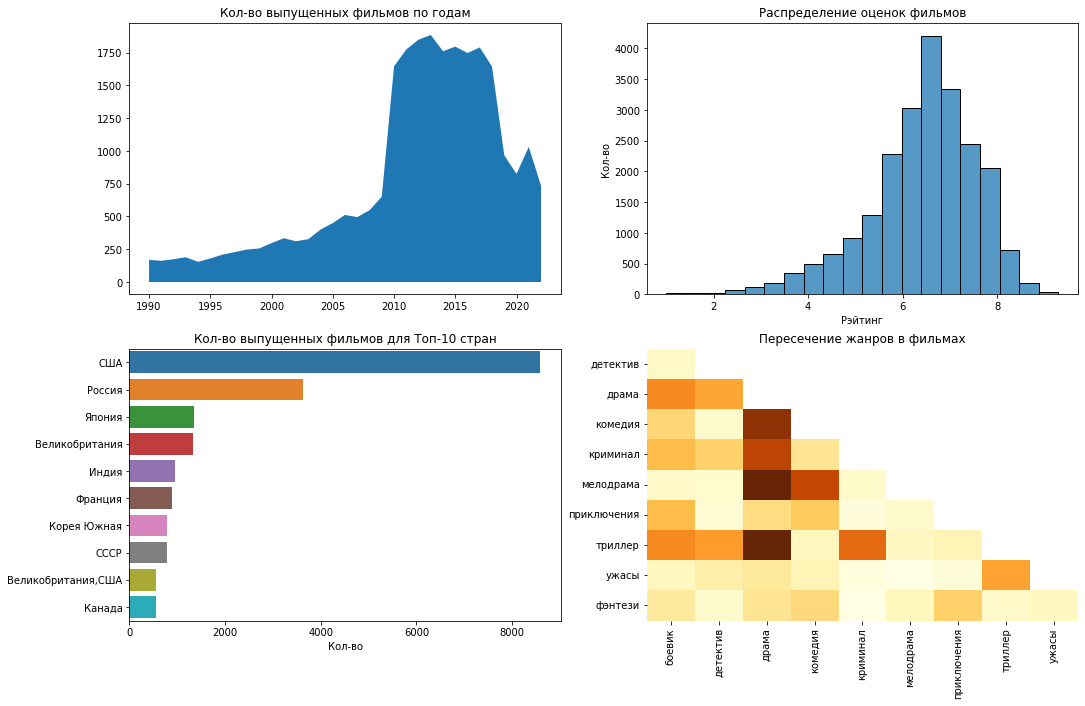

In [161]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(17,11))

temp = (films_df
        .query('year != "null"')['year']
        .astype(int)
        .value_counts()
        .sort_index()
        .loc[1990:2022])
axs[0,0].fill_between(temp.index, temp.values)
axs[0,0].set_title('Кол-во выпущенных фильмов по годам')

temp = (films_df
        .query('rating != "null"')['rating']
        .astype(float))
sns.histplot(temp, bins=20, ax=axs[0,1])
axs[0,1].set_title('Распределение оценок фильмов')
axs[0,1].set(xlabel='Рэйтинг')
axs[0,1].set(ylabel='Кол-во')

temp = (films_df
        .query('countries != "null"')['countries']
        .value_counts()
        .sort_values(ascending=False)[:10])
sns.barplot(y=temp.index, x=temp.values, ax=axs[1,0])
axs[1,0].set_title('Кол-во выпущенных фильмов для Топ-10 стран');
axs[1,0].set(xlabel='Кол-во')

sns.heatmap(
    pd.pivot_table(temp_pairs, index='genre1', columns='genre2', values='val', aggfunc='sum').T,
    cbar=False,
    cmap='YlOrBr', 
    ax=axs[1,1])
axs[1,1].set(xlabel=None)
axs[1,1].set(ylabel=None)
axs[1,1].set_title('Пересечение жанров в фильмах');

# Модель

# Telegram-bot